<a href="https://colab.research.google.com/github/Sumanth-35/Task-1-CIT/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


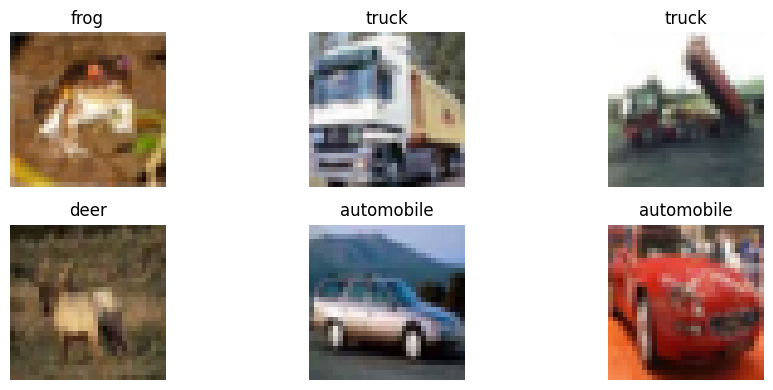

In [ ]:
# 📌 Step 2: Load and Explore CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display sample images
plt.figure(figsize=(10,4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# 📌 Step 3: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 📌 Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# 📌 Step 5: Train the Model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 79ms/step - accuracy: 0.3280 - loss: 1.8175 - val_accuracy: 0.5277 - val_loss: 1.3302
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.5407 - loss: 1.2926 - val_accuracy: 0.5721 - val_loss: 1.1957
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 74ms/step - accuracy: 0.6032 - loss: 1.1253 - val_accuracy: 0.6248 - val_loss: 1.0650
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 79ms/step - accuracy: 0.6416 - loss: 1.0197 - val_accuracy: 0.6485 - val_loss: 1.0082
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 74ms/step - accuracy: 0.6735 - loss: 0.9335 - val_accuracy: 0.6708 - val_loss: 0.9490
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 81ms/step - accuracy: 0.6990 - loss: 0.8629 - val_accuracy: 0.6851 - val_loss: 0.9135
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.7149 - loss: 0.8087 - val_accuracy: 0.6886 - val_loss: 0.8970
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7324 - loss: 0.7664 - 

In [ ]:
# 📌 Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


313/313 - 3s - 10ms/step - accuracy: 0.7029 - loss: 0.8787

✅ Test Accuracy: 0.7029


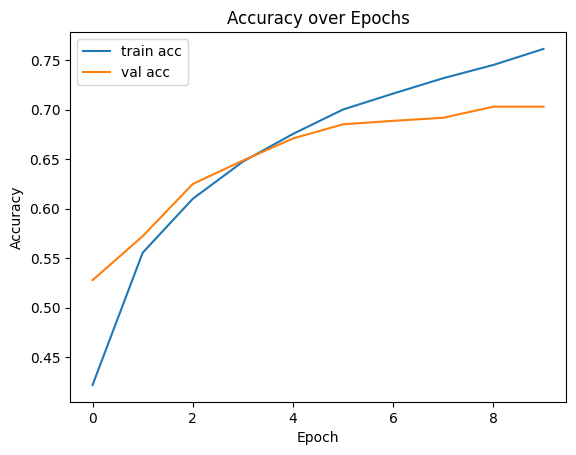

In [ ]:
# 📌 Step 7: Plot Training History
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


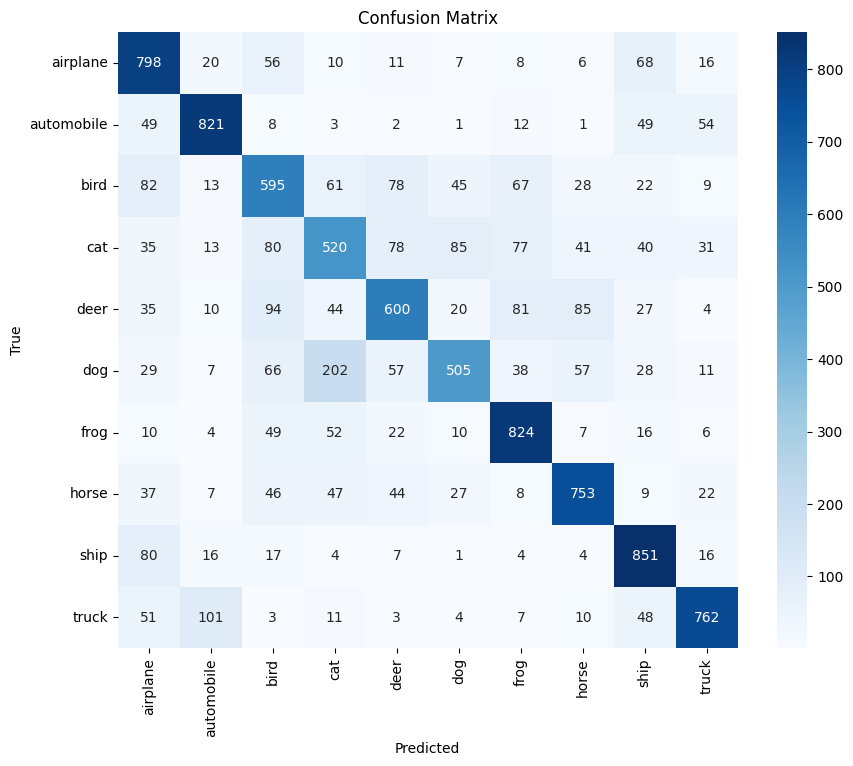


Classification Report:

              precision    recall  f1-score   support

    airplane       0.66      0.80      0.72      1000
  automobile       0.81      0.82      0.82      1000
        bird       0.59      0.59      0.59      1000
         cat       0.55      0.52      0.53      1000
        deer       0.67      0.60      0.63      1000
         dog       0.72      0.51      0.59      1000
        frog       0.73      0.82      0.78      1000
       horse       0.76      0.75      0.76      1000
        ship       0.73      0.85      0.79      1000
       truck       0.82      0.76      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
# 📌 Step 8: Confusion Matrix & Classification Report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=class_names))
